In [23]:
#LIBRARIES
import pandas as pd
from pycaret.regression import *
import seaborn as sns
import numpy as np

In [24]:
#READING
master=pd.read_csv('D:/R/Graduate/Admission_Predict_Ver1.1.csv')
master.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


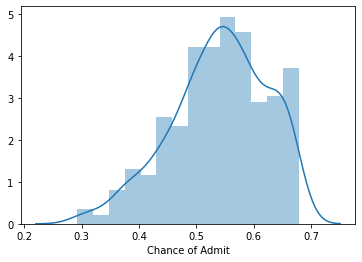

In [25]:
master['Chance of Admit '].skew()
master['Chance of Admit']=np.log1p(master['Chance of Admit '])
sns.distplot(master['Chance of Admit'])

In [26]:
reg1 = setup(master, target = 'Chance of Admit ', session_id = 123, silent = True) #silent is set to True for unattended run during kernel execution


 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(500, 10)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [27]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.000400,0.000000,0.001200,0.999900,0.000800,0.000700
1,Extreme Gradient Boosting,0.000400,0.000000,0.001400,0.999800,0.000900,0.000700
2,Decision Tree,0.000600,0.000000,0.002400,0.999600,0.001600,0.001200
3,Random Forest,0.000900,0.000000,0.002300,0.999600,0.001600,0.001800
4,Extra Trees Regressor,0.001700,0.000000,0.003300,0.999300,0.002200,0.002800
5,Least Angle Regression,0.004200,0.000000,0.005600,0.998300,0.003500,0.006600
6,Linear Regression,0.004200,0.000000,0.005600,0.998200,0.003500,0.006600
7,Bayesian Ridge,0.004200,0.000000,0.005600,0.998200,0.003500,0.006600
8,Random Sample Consensus,0.004200,0.000000,0.005600,0.998200,0.003500,0.006600
9,Orthogonal Matching Pursuit,0.005500,0.000100,0.006900,0.997300,0.004300,0.008500


In [28]:
xgb = create_model('xgboost', verbose = False) #verbose set to False to avoid printing score grid
gbr = create_model('gbr', verbose = False)
decison = create_model('dt', verbose = False)

# BLENDED MODELS#

In [29]:
blend_top_3 = blend_models(estimator_list = [xgb,gbr,decison])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0007,0.0,0.0025,0.9995,0.0017,0.0013
1,0.0005,0.0,0.0016,0.9999,0.0009,0.0009
2,0.0003,0.0,0.0007,1.0000,0.0004,0.0004
3,0.0003,0.0,0.0009,1.0000,0.0005,0.0004
4,0.0011,0.0,0.0042,0.9993,0.0031,0.0029
5,0.0004,0.0,0.0010,0.9999,0.0007,0.0007
6,0.0003,0.0,0.0017,0.9998,0.0011,0.0007
7,0.0001,0.0,0.0001,1.0000,0.0000,0.0001
8,0.0002,0.0,0.0006,1.0000,0.0004,0.0004
9,0.0003,0.0,0.0009,1.0000,0.0006,0.0006


# STACK MODELS#

In [30]:
stack1 = stack_models(estimator_list = [gbr,decison], meta_model = xgb, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0008,0.0,0.0025,0.9995,0.0015,0.0013
1,0.0004,0.0,0.0016,0.9999,0.0008,0.0005
2,0.0003,0.0,0.0005,1.0000,0.0003,0.0003
3,0.0004,0.0,0.0016,0.9999,0.0008,0.0004
4,0.0010,0.0,0.0047,0.9991,0.0034,0.0027
5,0.0002,0.0,0.0008,1.0000,0.0006,0.0005
6,0.0004,0.0,0.0017,0.9998,0.0011,0.0007
7,0.0001,0.0,0.0002,1.0000,0.0001,0.0001
8,0.0001,0.0,0.0003,1.0000,0.0002,0.0002
9,0.0003,0.0,0.0005,1.0000,0.0003,0.0003


# TUNNING#

In [32]:
huber = tune_model('xgboost', n_iter = 100)
# evaluate a model 
evaluate_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0008,0.0000,0.0019,0.9997,0.0010,0.0010
1,0.0021,0.0000,0.0044,0.9993,0.0028,0.0036
2,0.0007,0.0000,0.0013,0.9999,0.0007,0.0008
3,0.0010,0.0000,0.0016,0.9999,0.0010,0.0015
4,0.0025,0.0001,0.0091,0.9965,0.0067,0.0065
5,0.0007,0.0000,0.0014,0.9999,0.0010,0.0013
6,0.0007,0.0000,0.0015,0.9999,0.0009,0.0011
7,0.0005,0.0000,0.0010,0.9999,0.0005,0.0007
8,0.0013,0.0000,0.0019,0.9998,0.0011,0.0018
9,0.0013,0.0000,0.0028,0.9996,0.0016,0.0018


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# PREDICTION#

In [34]:
predict_model(xgb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.0005,0.0,0.0025,0.9997,0.0018,0.0012


In [35]:
final_stack_1 = finalize_model(xgb)

# Predict on unseen data#

In [36]:
unseen_predictions = predict_model(xgb, data=master, round=0)
unseen_predictions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit,Label
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.652325,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.565314,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.542324,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.587787,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.500775,1.0


#  Save the experiment#

In [38]:
save_model(xgb, 'xg_model_23122019')

Transformation Pipeline and Model Succesfully Saved
